<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Credit_Scoring_and_Segmentation/blob/main/Credit_Scoring_and_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The process of calculating credit scores and segmenting customers based on their credit scores involves several steps. Firstly, relevant data about borrowers, such as payment history, credit utilization, credit history, and credit mix, is collected and organized. Then, using complex algorithms and statistical models, the collected data is analyzed to generate credit scores for each borrower.

These credit scores are numerical representations of the borrower’s creditworthiness and indicate the likelihood of default or timely repayment. Once the credit scores are calculated, customers are segmented into different risk categories or credit tiers based on predefined thresholds.

This segmentation helps financial institutions assess the credit risk associated with each customer and make informed decisions regarding loan approvals, interest rates, and credit limits. By categorizing customers into segments, financial institutions can better manage their lending portfolios and effectively mitigate the risk of potential defaults.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




In [ ]:
df = pd.read_csv("/content/credit_scoring.csv")
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


Below is the description of all the features in the data:

Age: This feature represents the age of the individual.

Gender: This feature captures the gender of the individual.

Marital Status: This feature denotes the marital status of the individual.

Education Level: This feature represents the highest level of education attained by the individual.

Employment Status: This feature indicates the current employment status of the individual.

Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.

Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.

Number of Credit Accounts: It represents the count of active credit accounts the person holds.

Loan Amount: It indicates the monetary value of the loan.

Interest Rate: This feature represents the interest rate associated with the loan.

Loan Term: This feature denotes the duration or term of the loan.

Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

Now let’s have a look at column insights before moving forward:



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


Distribution of the credit utilization ratio in the data

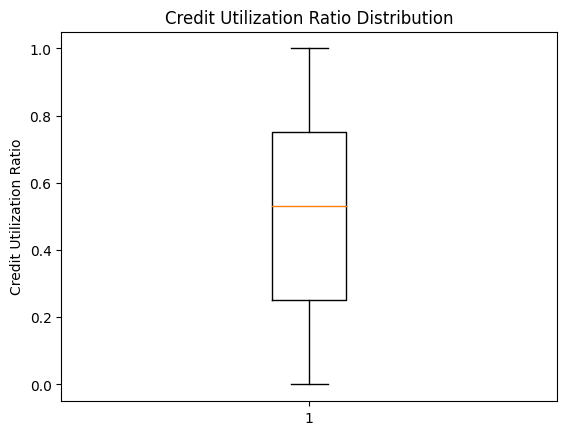

In [ ]:
plt.boxplot(df['Credit Utilization Ratio'])
plt.title('Credit Utilization Ratio Distribution')
plt.ylabel('Credit Utilization Ratio')

plt.show()


Distribution of the loan amount in the data:

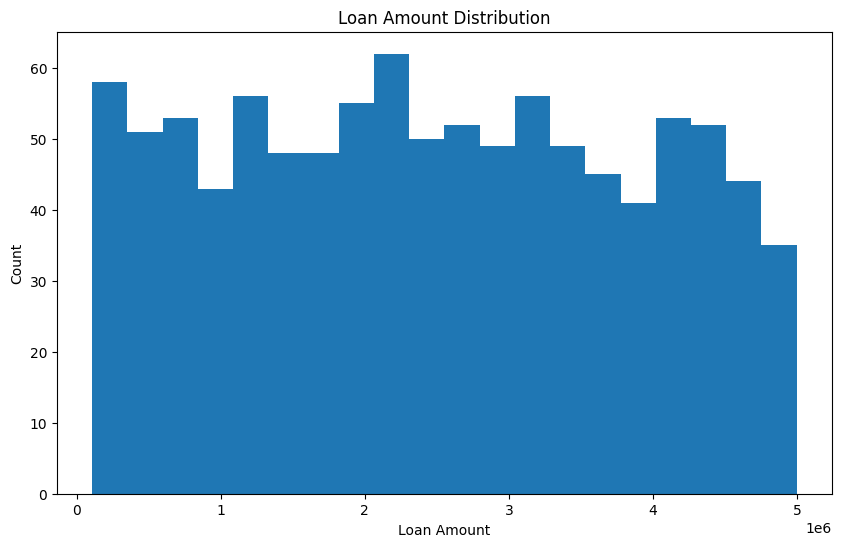

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Loan Amount'], bins=20)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.show()


Correlation in the data:

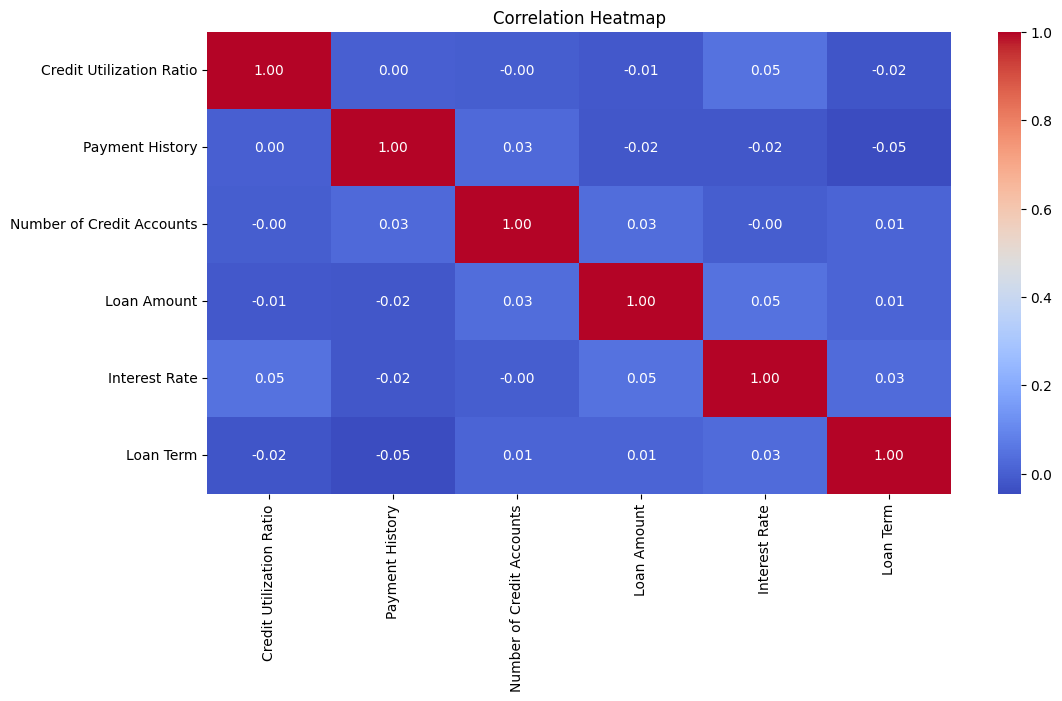

In [ ]:
numeric_df = df[['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Term']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Calculating Credit Scores**

The dataset doesn’t have any feature representing the credit scores of individuals. To calculate the credit scores, we need to use an appropriate technique. There are several widely used techniques for calculating credit scores, each with its own calculation process. One example is the FICO score, a commonly used credit scoring model in the industry.

In [ ]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
df['Credit Score'] = credit_scores

df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


Below is how the above code works:

Firstly, it defines mappings for two categorical features: “Education Level” and “Employment Status”. The “Education Level” mapping assigns numerical values to different levels of education, such as “High School” being mapped to 1, “Bachelor” to 2, “Master” to 3, and “PhD” to 4. The “Employment Status” mapping assigns numerical values to different employment statuses, such as “Unemployed” being mapped to 0, “Employed” to 1, and “Self-Employed” to 2.

Next, the code applies the defined mappings to the corresponding columns in the DataFrame. It transforms the values of the “Education Level” and “Employment Status” columns from their original categorical form to the mapped numerical representations.

After that, the code initiates an iteration over each row of the DataFrame to calculate the credit scores for each individual. It retrieves the values of relevant features, such as “Payment History”, “Credit Utilization Ratio”, “Number of Credit Accounts”, “Education Level”, and “Employment Status”, from each row.

Within the iteration, the FICO formula is applied to calculate the credit score for each individual. The formula incorporates the weighted values of the features mentioned earlier:

35% weight for “Payment History”,

30% weight for “Credit Utilization Ratio”,

15% weight for “Number of Credit Accounts”,

10% weight for “Education Level”,

and 10% weight for “Employment Status”.

The calculated credit score is then stored in a list called “credit_scores”.



**Segmentation Based on Credit Scores**

Now, let’s use the KMeans clustering algorithm to segment customers based on their credit scores:

In [ ]:
X = df[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
df['Segment'] = kmeans.labels_

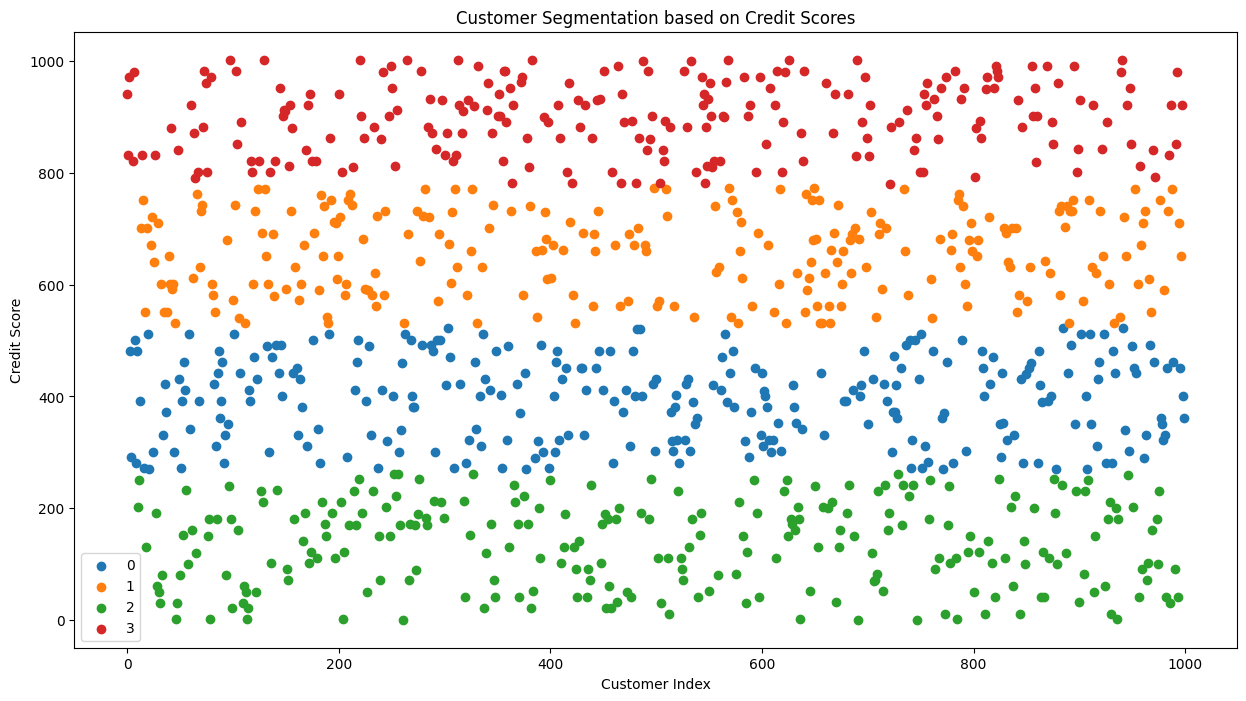

In [ ]:
# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

# Get unique segments
segments = df['Segment'].cat.categories

# Create a scatter plot for each segment
plt.figure(figsize=(15, 8))
for segment in segments:
    segment_data = df[df['Segment'] == segment]
    plt.scatter(segment_data.index, segment_data['Credit Score'], label=segment)

# Set labels and title
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')

# Add legend and colorbar
plt.legend()

plt.show()


Now let’s name the segments based on the above clusters and have a look at the segments again:

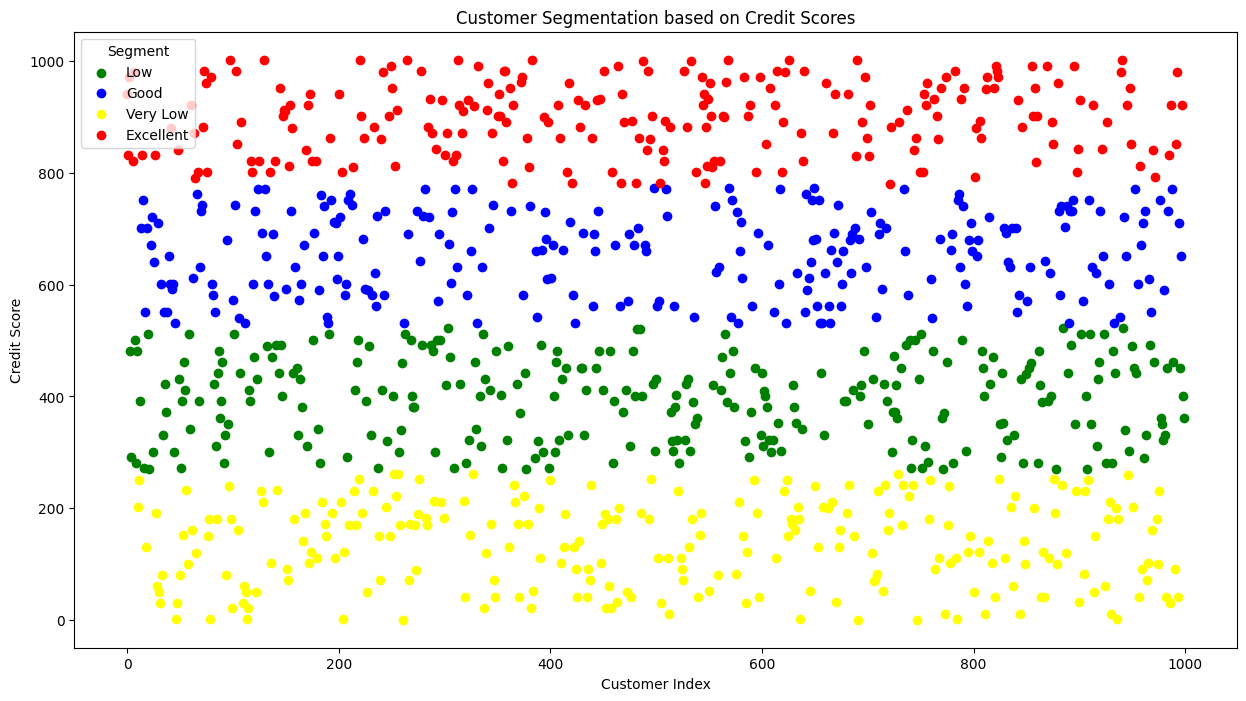

In [ ]:
df['Segment'] = df['Segment'].map({2: 'Very Low', 0: 'Low', 1: 'Good', 3: 'Excellent'})

# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

# Create a scatter plot
plt.figure(figsize=(15, 8))
colors = ['green', 'blue', 'yellow', 'red']
segments = df['Segment'].cat.categories

for segment, color in zip(segments, colors):
    segment_data = df[df['Segment'] == segment]
    plt.scatter(segment_data.index, segment_data['Credit Score'], color=color, label=segment)

# Set labels and title
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')

# Add legend
plt.legend(title='Segment')

plt.show()


Credit scoring and segmentation refer to the process of evaluating the creditworthiness of individuals or businesses and dividing them into distinct groups based on their credit profiles. It aims to assess the likelihood of borrowers repaying their debts and helps financial institutions make informed decisions regarding lending and managing credit risk